let's proceed with the Scikit-learn implementation examples for **Gaussian Naive Bayes** and **Multinomial Naive Bayes**.


**Example 1: Gaussian Naive Bayes (GaussianNB)**

We'll use the **Iris dataset** for this example. GaussianNB is suitable here because the features (sepal length, sepal width, petal length, petal width) are continuous numerical values, and GaussianNB assumes these features follow a Gaussian (normal) distribution within each class.


In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler # Good practice, though less critical for GaussianNB itself
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# --- 1. Load Iris Dataset ---
iris = load_iris()
X, y = iris.data, iris.target
feature_names = iris.feature_names
target_names = iris.target_names

X_df = pd.DataFrame(X, columns=feature_names)
print("Iris Dataset Loaded for Gaussian Naive Bayes.")
print(f"Features shape: {X_df.shape}, Target shape: {y.shape}")
print(f"Target names: {target_names}") # ['setosa' 'versicolor' 'virginica']
print(f"Class distribution: {np.bincount(y)}")


Iris Dataset Loaded for Gaussian Naive Bayes.
Features shape: (150, 4), Target shape: (150,)
Target names: ['setosa' 'versicolor' 'virginica']
Class distribution: [50 50 50]


In [4]:
# --- 2. Split Data ---
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X_df, y, test_size=0.3, random_state=42, stratify=y
)

In [5]:
# --- 3. Feature Scaling ---
# While GaussianNB computes mean/std per feature per class independently,
# scaling can be good practice if comparing with other scaled models or if features have vastly different ranges
# that might lead to numerical precision issues (less likely with GaussianNB's direct calculations).
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_raw)
X_test = scaler.transform(X_test_raw)
print("\nIris Data Scaled.")



Iris Data Scaled.


In [6]:
# --- 4. Instantiate and Train Gaussian Naive Bayes Model ---
# Key parameters for GaussianNB:
#   priors: array-like of shape (n_classes,), default=None (priors adjusted according to data)
#   var_smoothing: float, default=1e-9
#     Portion of the largest variance of all features that is added to variances for calculation stability.
#     This is important to handle features with zero variance in a class or to act as a regularizer.
gnb_model = GaussianNB(var_smoothing=1e-9) # Using default var_smoothing
gnb_model.fit(X_train, y_train)

GaussianNB()

In [7]:
# --- 5. Make Predictions ---
y_pred_gnb = gnb_model.predict(X_test)
y_pred_proba_gnb = gnb_model.predict_proba(X_test) # Probabilities for each class


--- Gaussian Naive Bayes Model Evaluation (Iris Dataset) ---
Accuracy: 0.9111

Confusion Matrix:


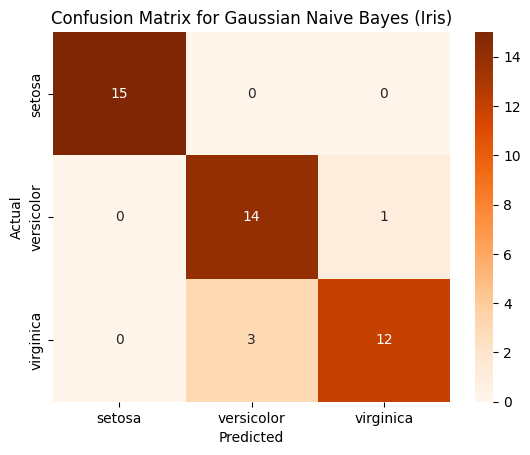


Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.82      0.93      0.88        15
   virginica       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45


Predicted probabilities for first 5 test samples:
Sample 1: Actual=virginica, Predicted Probs=[0. 0. 1.]
Sample 2: Actual=versicolor, Predicted Probs=[0.    0.996 0.004]
Sample 3: Actual=virginica, Predicted Probs=[0.    0.847 0.153]
Sample 4: Actual=versicolor, Predicted Probs=[0.    0.668 0.332]
Sample 5: Actual=virginica, Predicted Probs=[0.    0.104 0.896]


In [8]:
# --- 6. Evaluate the Model ---
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)

print("\n--- Gaussian Naive Bayes Model Evaluation (Iris Dataset) ---")
print(f"Accuracy: {accuracy_gnb:.4f}")

print("\nConfusion Matrix:")
cm_gnb = confusion_matrix(y_test, y_pred_gnb)
sns.heatmap(cm_gnb, annot=True, fmt="d", cmap="Oranges", xticklabels=target_names, yticklabels=target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Gaussian Naive Bayes (Iris)")
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred_gnb, target_names=target_names))

# Display some predicted probabilities for the first few test samples
print("\nPredicted probabilities for first 5 test samples:")
for i in range(5):
    print(f"Sample {i+1}: Actual={target_names[y_test[i]]}, Predicted Probs={np.round(y_pred_proba_gnb[i], 3)}")

# Learned parameters (class priors, means, and variances for each feature per class)
# print(f"\nClass Priors: {gnb_model.class_prior_}")
# print(f"Class Means (theta_): \n{gnb_model.theta_}") # Shape (n_classes, n_features)
# print(f"Class Variances (var_): \n{gnb_model.var_}") # Shape (n_classes, n_features) formerly sigma_

**Discussion for GaussianNB Example:**
* The Iris dataset features are continuous, making GaussianNB appropriate.
* `var_smoothing` is a small value added to the variances of features during calculation. This is crucial for numerical stability, especially if a feature has zero variance within a class in the training set (meaning all samples of that class have the same value for that feature). It acts somewhat like a regularizer.
* The model calculates the mean and variance for each feature within each of the three Iris classes and uses these to estimate probabilities based on the Gaussian distribution.
* GaussianNB performs quite well on the Iris dataset.
---

**Example 2: Multinomial Naive Bayes (MultinomialNB) for Text Classification**

We'll create a very simple synthetic text dataset for a binary classification task (e.g., positive vs. negative sentiment). This highlights the text vectorization step crucial for using MultinomialNB.


In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:
# --- 1. Create Simple Synthetic Text Data ---
# Sample documents and their labels (0 for negative, 1 for positive)
corpus = [
    "this is a great and amazing movie",        # Positive
    "I really enjoyed this film fantastic",     # Positive
    "awesome content love it so good",          # Positive
    "such a wonderful experience truly great",  # Positive
    "a terrible plot and very boring",          # Negative
    "I did not like this at all bad acting",    # Negative
    "waste of time horrible movie",             # Negative
    "poorly made and quite dull very bad"       # Negative
]
labels = np.array([1, 1, 1, 1, 0, 0, 0, 0]) # 1 for Positive, 0 for Negative
target_names_text = ['Negative', 'Positive']

print("Simple Text Dataset Created for Multinomial Naive Bayes.")
print(f"Number of documents: {len(corpus)}, Number of labels: {len(labels)}")


Simple Text Dataset Created for Multinomial Naive Bayes.
Number of documents: 8, Number of labels: 8


In [11]:
# --- 2. Split Data (Text data itself, before vectorization) ---
X_train_text, X_test_text, y_train_text, y_test_text = train_test_split(
    corpus, labels, test_size=0.25, random_state=42, stratify=labels # Small dataset, 25% for test = 2 samples
)
print(f"\nTraining texts: {len(X_train_text)}, Test texts: {len(X_test_text)}")



Training texts: 6, Test texts: 2


In [13]:
# --- 3. Text Vectorization using CountVectorizer ---
# Converts a collection of text documents to a matrix of token counts.
# This creates our feature matrix where each unique word is a feature
# and the value is the count of that word in the document.
vectorizer = CountVectorizer()


# Fit the vectorizer on the training data to learn the vocabulary
# and then transform the training data into a document-term matrix.
X_train_vec = vectorizer.fit_transform(X_train_text)

# Transform the test data using the vocabulary learned from the training data.
X_test_vec = vectorizer.transform(X_test_text)

print(f"\nText data vectorized. Vocabulary size: {len(vectorizer.get_feature_names_out())}")
print(f"Shape of X_train_vec: {X_train_vec.shape}") # (n_train_samples, n_vocabulary_size)
# print("Vocabulary:", vectorizer.get_feature_names_out())
# print("X_train_vec (sparse matrix representation for first doc):\n", X_train_vec[0])



Text data vectorized. Vocabulary size: 29
Shape of X_train_vec: (6, 29)


In [14]:
# --- 4. Instantiate and Train Multinomial Naive Bayes Model ---
# Key parameter for MultinomialNB:
#   alpha: float, default=1.0
#     Additive (Laplace/Lidstone) smoothing parameter.
#     0 for no smoothing.
#   fit_prior: bool, default=True
#     Whether to learn class prior probabilities or use uniform priors.
mnb_model = MultinomialNB(alpha=1.0) # alpha=1.0 is Laplace smoothing
mnb_model.fit(X_train_vec, y_train_text)

MultinomialNB()

In [15]:
# --- 5. Make Predictions ---
y_pred_mnb = mnb_model.predict(X_test_vec)
y_pred_proba_mnb = mnb_model.predict_proba(X_test_vec)



--- Multinomial Naive Bayes Model Evaluation (Simple Text Data) ---
Accuracy: 0.0000

Confusion Matrix:


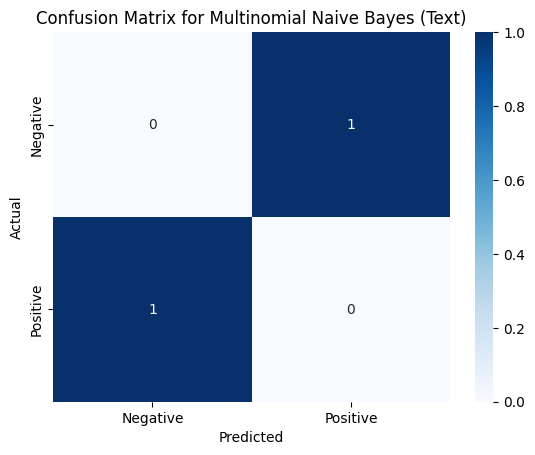


Classification Report:
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00       1.0
    Positive       0.00      0.00      0.00       1.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0


Predicted probabilities for test samples:
Sample: "waste of time horrible movie"
  Actual: Negative, Predicted Probs: [0.315 0.685]

Sample: "awesome content love it so good"
  Actual: Positive, Predicted Probs: [0.5 0.5]



In [16]:
# --- 6. Evaluate the Model ---
accuracy_mnb = accuracy_score(y_test_text, y_pred_mnb)

print("\n--- Multinomial Naive Bayes Model Evaluation (Simple Text Data) ---")
print(f"Accuracy: {accuracy_mnb:.4f}")

print("\nConfusion Matrix:")
cm_mnb = confusion_matrix(y_test_text, y_pred_mnb)
sns.heatmap(cm_mnb, annot=True, fmt="d", cmap="Blues", xticklabels=target_names_text, yticklabels=target_names_text)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Multinomial Naive Bayes (Text)")
plt.show()

print("\nClassification Report:")
print(classification_report(y_test_text, y_pred_mnb, target_names=target_names_text, zero_division=0))

# Display some predicted probabilities for the test samples
print("\nPredicted probabilities for test samples:")
for i in range(len(X_test_text)):
    print(f"Sample: \"{X_test_text[i]}\"")
    print(f"  Actual: {target_names_text[y_test_text[i]]}, Predicted Probs: {np.round(y_pred_proba_mnb[i], 3)}\n")

# Learned parameters (log probabilities for features per class)
# print(f"\nLog P(feature|class) : {mnb_model.feature_log_prob_.shape}")

---

**Discussion for MultinomialNB Example:**
* **Text Vectorization:** The `CountVectorizer` is essential. It converts text into a numerical format (a matrix of word counts) that machine learning algorithms can understand. Each unique word in the training vocabulary becomes a feature.
* **`alpha` for Smoothing:** `MultinomialNB(alpha=1.0)` applies Laplace smoothing. This is vital for text data because test documents might contain words not seen in training documents for a particular class. Without smoothing, this would lead to zero probabilities.
* **Performance on Small Data:** With such a tiny dataset, the evaluation metrics might not be very robust, but the example demonstrates the workflow. In a real scenario, you'd use a much larger corpus.
* MultinomialNB is well-suited for features representing counts, making it a go-to for text classification with word frequencies.

These two examples showcase how to use `GaussianNB` for continuous features and `MultinomialNB` for count-based features (like text). The process involves similar steps: preparing data (including vectorization for text), splitting, training, predicting, and evaluating.